In [ ]:
## Vehicle crashes occur all over the world, with varying severity, traffic rules, vehicle characteristics, 
## driving behavior, weather etc., each of which play a significant role in the outcome of the crash.
## While most of the data science applications for crash analysis have been only in advanced visualization, there is limited study of 
## developing advanced machine learning algorithms that can help predict future crashes and its severities based on several parameters.
## The limited existing models are developed for much larger areas which may result in overfit/underfit issue.
## Hence, 'One model fits all' is an outdated strategy and will not be beneficial in providing actionable insights to zone specific crashes which may have different parameters. 

## Through my project at the Data Incubator, I wish to develop an automated system which in return develops machine learning models 
## to predict future fatal or non fatal crashes for any chosen area. These models would be focussed towards very specific zones/areas/road corridors, which I term as micro-crash models.
## The intention here is to develop custom models that are built solely on the data that is represented by that zone/area
## rather than a much larger set. Having such area specific models through an automated system will be beneficial to a lot of state or federal
## Department's of Transport who can have access to a tool that can deliver key actionable insights,
## and help direct their crash preventive measures more effectively in future.
## This can help direct their budget, initiatives, and efforts to specific locations that need the most attention.
## Outcomes of such models can be imposing traffic regulations during peak crash hours, zones, restricitng certain category of vehicles etc.

## Data availability:
## A lot of Transportation agencies, City DOT's, Federal DOT's provide traffic and crash related open data that can be easily acquired
## to develop this bigger idea. I wish to develop a full fledged application that can be responsive in real time and update the
## models with live feed of additional data through pipelines whenever available. As of today, there is no such automated model development application in Transportation.

# Asset 2:

## By using crash data for NYC provided by City of New York at (https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95)
## I have worked on developing some plots that can provide insights about the need of having micro-models 



In [1]:
# We will import the needed libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\shriks44\Anaconda3_2019\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
# Read the data into a pandas data frame
df = pd.read_csv("E:\\Data Science\\The_Data_Incubator\\Motor_Vehicle_Collisions_-_Crashes.csv")
print(df.shape)

(1687742, 29)


In [5]:
## Extract the month, hour, day of week from the data
df['month'] = pd.DatetimeIndex(df['CRASH DATE']).month
df['pd_datetime'] = pd.to_datetime(df['CRASH DATE'])
df['weekday'] = df['pd_datetime'].dt.dayofweek
df['hour'] = pd.to_datetime(df['CRASH TIME']).dt.hour
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,month,pd_datetime,weekday,hour
0,10/13/2016,11:23,MANHATTAN,10011,40.744100,-73.99565,POINT (-73.99565 40.7441),WEST 23 STREET,7 AVENUE,NaN,...,3540699,Box Truck,Bulk Agriculture,NaN,NaN,NaN,10,2016-10-13,3,11
1,11/01/2016,22:10,MANHATTAN,10013,40.722584,-74.00636,POINT (-74.00636 40.722584),VARICK STREET,CANAL STREET,NaN,...,3553200,Sedan,Sedan,NaN,NaN,NaN,11,2016-11-01,1,22
2,10/22/2016,20:00,NaN,NaN,40.692250,-73.81791,POINT (-73.81791 40.69225),101 AVENUE,129 STREET,NaN,...,3544924,Sedan,Sedan,NaN,NaN,NaN,10,2016-10-22,5,20
3,11/03/2016,17:35,BROOKLYN,11217,40.687004,-73.97960,POINT (-73.9796 40.687004),FLATBUSH AVENUE,3 AVENUE,NaN,...,3553668,Sedan,Bus,NaN,NaN,NaN,11,2016-11-03,3,17
4,10/14/2016,23:15,MANHATTAN,10034,40.869550,-73.91519,POINT (-73.91519 40.86955),WEST 215 STREET,10 AVENUE,NaN,...,3545177,Sedan,Sedan,NaN,NaN,NaN,10,2016-10-14,4,23


In [19]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'month', 'pd_datetime', 'weekday', 'hour'],
      dtype='object')

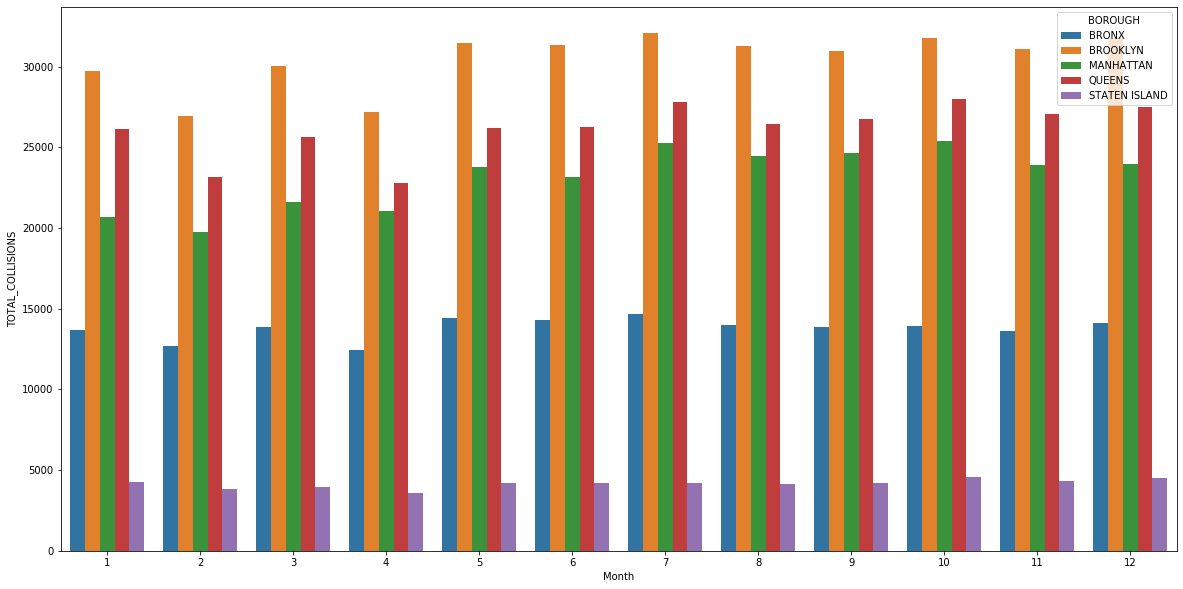

In [18]:
## Count the crashes for each Borough for every month
df1 = df.groupby(['BOROUGH','month'])['COLLISION_ID'].count().reset_index()
df1.columns = ['BOROUGH','Month','TOTAL_COLLISIONS']

plt.figure(figsize=(20,10))
sns.barplot(x = 'Month', y = 'TOTAL_COLLISIONS', data = df1, hue = 'BOROUGH')

In [ ]:
## In the above plot it can be seen that, Brooklyn experiences the highest number of collisions as compared to other boroughs
## where as Staten Island reports the lowest.
## It is definitely good to know the above statistics, however this also indicates different crash statistics bheavior
## in the 2 regions and hence a micro model at Borough level can be developed to direct efforts for crash prevention.

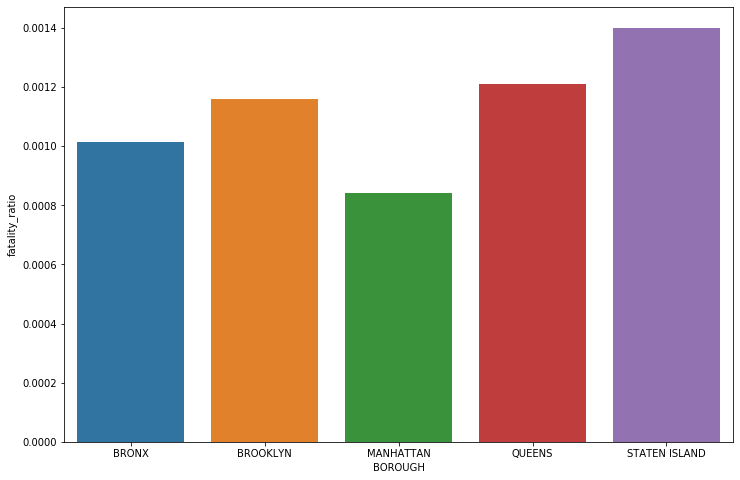

In [28]:
df2 = df.groupby(['BOROUGH'])['NUMBER OF PERSONS KILLED'].sum().reset_index()
df3 = df.groupby(['BOROUGH'])['COLLISION_ID'].count().reset_index()
#df1.columns = ['BOROUGH','Month','TOTAL_COLLISIONS']
df2['fatality_ratio'] = df2['NUMBER OF PERSONS KILLED']/df3['COLLISION_ID']

plt.figure(figsize=(12,8))
sns.barplot(x = 'BOROUGH', y = 'fatality_ratio', data=df2)

In [ ]:
## From the above plot, it can be seen that the severity of crashes in terms of fatality ratio is higher in Staten Island although its total crashes are less
## This indicates that the micro-model for Staten Island needs to emphasize more on the factors that contributed to fatal crashes there as compared to others.
## The above statistic also justifies that a micro-model can is essential

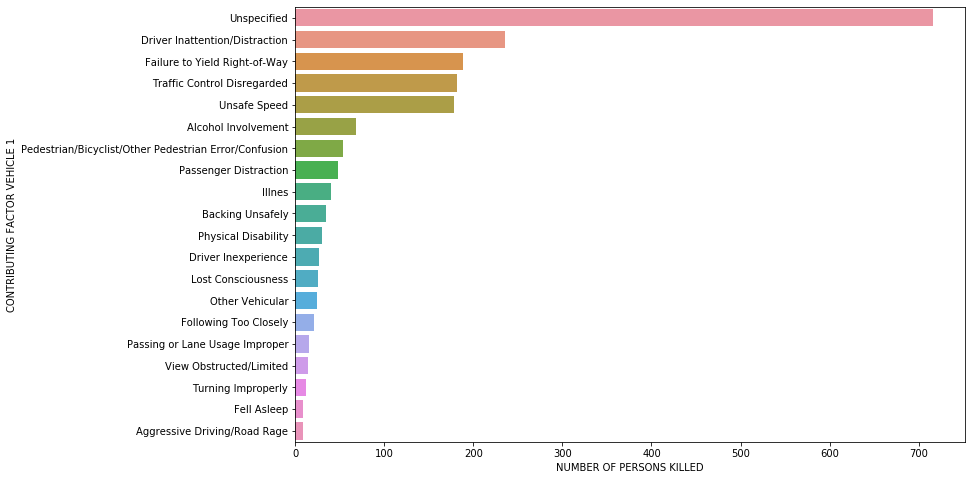

In [36]:
df4 = df.groupby(['CONTRIBUTING FACTOR VEHICLE 1'])['NUMBER OF PERSONS KILLED'].sum().reset_index()
df4.sort_values('NUMBER OF PERSONS KILLED', ascending=False, inplace=True)
plt.figure(figsize=(12,8))
sns.barplot(x = 'NUMBER OF PERSONS KILLED', y = 'CONTRIBUTING FACTOR VEHICLE 1', data=df4.head(20))

In [ ]:
## From the above plot, it can be seen that the contributing factors in fatal crashes have varying significance. 
## As the fatality ratio for boroughs were different, it indicates that these contributing factors would carry different weights
## in different micro models.